In [7]:
import zipfile

file_list = os.listdir(os.curdir)

for file in file_list:
    if file.endswith('.zip'):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()

In [3]:
print(os.getcwd())

C:\Gatech\cs506\xml_to_csv


In [4]:
def convert(info, xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for element in root.findall("us-bibliographic-data-grant"):
            us_parties = element.find('us-parties')
            publication_reference = element.find('publication-reference')
            application_reference = element.find('application-reference')
            priority_claims = element.find('priority-claims')
            invention_title = element.find('invention-title')
            number_of_claims = element.find('number-of-claims')

        #1
        publication_id = publication_reference[0][0].text + publication_reference[0][1].text

        publication_kind = publication_reference[0][2].text

        publication_date = publication_reference[0][3].text
        #2
        application_id = application_reference[0][0].text + application_reference[0][1].text

        application_date = application_reference[0][2].text
        #3
        country = 'US'
        if priority_claims:
            country = priority_claims[0][0].text
        #4
        for element in us_parties.findall('inventors'):
            inventor = element.findall('inventor')
            ivt_name = []
            ivt_firstname = []
            ivt_country = []
            for i in range(0,len(inventor)):
                ivt_name.append(inventor[i][0][0].text + ' ' + inventor[i][0][1].text)
                ivt_firstname.append(inventor[i][0][1].text)
                if len(inventor[i][0])>2:
                    temp_ivt_country = inventor[i][0][2][-1].text
                    ivt_country.append(temp_ivt_country)
                else:
                    ivt_country.append('NA')
        #5
        title = 'NA'
        if invention_title.text:
            title = invention_title.text
        #6
        noc = 'NA'
        if number_of_claims.text:
            noc = number_of_claims.text
        #7
        for element in us_parties.findall('agents'):
            agent = element.findall('agent')
            atn_name = []
            atn_firstname = []
            atn_country = []
            for i in range(0,len(agent)):
                if len(agent[i][0])>2:
                    atn_name.append(agent[i][0][0].text + ' ' + agent[i][0][1].text)
                    atn_firstname.append(agent[i][0][1].text)

        ######
        info.append([publication_id,
                            publication_kind,
                            publication_date,
                            application_id,
                            application_date,
                            country,
                            ivt_name,
                            ivt_firstname,
                            ivt_country,
                            title,
                            noc,
                            atn_name,
                            atn_firstname])

        return info
    except:
        return info

In [8]:
import xml.etree.ElementTree as ET
import os
import pandas as pd

file_list = os.listdir(os.curdir)
information = []
count = 0
for file_name in file_list:
    if file_name.endswith('xml'):
        f = open(file_name, "r")
        content = f.read()

        content_list = content.splitlines()
        f.close()

        slow = 0

        cur_file = file_name
        case_num = 1
        case_num_str = case_num
        for i in range(len(content_list)):
            if (content_list[i] == "<?xml version=\"1.0\" encoding=\"UTF-8\"?>" and i > 0) :
                individual_filename = 'individual_file_{}.xml'.format(cur_file + '_' + str(case_num_str))
                with open(individual_filename, 'w') as f:
                    for element in content_list[slow : i]:
                        f.write(element + "\n")
                f.close()
                information = convert(information, individual_filename)
                os.remove(individual_filename)
                slow = i
            if i == (len(content_list) - 1):
                individual_filename = 'individual_file_{}.xml'.format(cur_file + '_' + str(case_num_str))
                with open(individual_filename, 'w') as f:
                    for element in content_list[slow :]:
                        f.write(element + "\n")
                f.close()
                information = convert(information, individual_filename)
                os.remove(individual_filename)
            case_num += 1
            case_num_str = case_num


df = pd.DataFrame(information, columns =['publication_id',
                                         'publication_kind',
                                         'publication_date',
                                         'application_id',
                                         'application_date',
                                         'country',
                                         'inventor_name',
                                         'inventor_firstname',
                                         'inventor_country',
                                         'invention_title',
                                         'number_of_claims',
                                         'attorney_name',
                                         'attorney_firstname'])
df.to_csv('2016_patent_grant.csv',index=False)

In [1]:
import csv

with open('wgnd_2_0_name-gender-code.csv', mode='r', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    with open('wgnd_2_0_name-gender-code_new.csv', mode='w', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        mydict = {rows[0]:rows[2] for rows in reader}

print(len(mydict))

4148968


In [3]:
import pandas as pd

df = pd.read_csv('2016_patent_grant.csv')
df.head()

,publication_id,publication_kind,publication_date,application_id,application_date,country,inventor_name,inventor_firstname,inventor_country,invention_title,number_of_claims,attorney_name,attorney_firstname
0,USD0746541,S1,20160105,US29490315,20140508,US,['Sambashivan Sidharth'],['Sidharth'],['US'],Snack food product,1,"['Cahoon Colin P.', 'Orr Celina M.']","['Colin P.', 'Celina M.']"
1,USD0746542,S1,20160105,US29490956,20140515,US,['Gilroy Brian'],['Brian'],['US'],Combined pair of suspenders and attachment mem...,1,[],[]
2,USD0746544,S1,20160105,US29504333,20141003,US,['Curran David Jeffrey'],['David Jeffrey'],['US'],Convertible shorts,1,[],[]
3,USD0746545,S1,20160105,US29527119,20150515,US,['Kositchiranant Paridee'],['Paridee'],['US'],Pants,1,[],[]
4,USD0746546,S1,20160105,US29531599,20150626,US,['Rosenbaum Vadim'],['Vadim'],['CA'],Asymmetrical pants,1,['Eisenberg Michael D.'],['Michael D.']


In [19]:
from ast import literal_eval

for i in range(100):
    for name in literal_eval(df['inventor_firstname'][i]):
        name = name.split()[0]
        if not(name.lower() in mydict):
            print(name)

Paridee
Ying-Tsung
Phaysouk
Yong-Yue
Vienar


In [45]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)
print(d.get_gender('balakrishnan'))

unknown


In [2]:
import nltk
import random
from nltk.corpus import names

nltk.download('names')
def gender_features(word):
    return {'whole_name':word[:]}

labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
                 [(name, 'female') for name in names.words('female.txt')])

random.shuffle(labeled_names)

featuresets = [(gender_features(n), gender)
               for (n, gender)in labeled_names]

train_set, test_set = featuresets[1000:], featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, train_set))

0.962413594470046


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\durus\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [4]:
from ast import literal_eval

def get_nums(df_in):
    num_males = []
    num_females = []
    num_unknown = []

    total_count = 0
    male_count = 0
    female_count = 0
    atleast_one = 0
    unknown_count = 0
    total_count_att = 0
    male_count_att = 0
    female_count_att = 0
    atleast_one_att = 0
    count = 0
    domestic_total = 0
    domestic_female = 0
    foreign_total = 0
    foreign_female = 0
    domestic_total_att = 0
    domestic_female_att = 0
    foreign_total_att = 0
    foreign_female_att = 0

    for j in range(len(df_in['inventor_firstname'])):
        count += 1
        temp = 0
        name_list = literal_eval(df_in['inventor_firstname'][j])
        country_list = literal_eval(df_in['inventor_country'][j])
        for z in range(len(name_list)):
            try:
                name_ = name_list[z].split()[0]
                if '-' in name_:
                    name_ = name_.split('-')[0]
                if mydict.get(name_.lower()) == 'F':
                    temp += 1
                    total_count += 1
                    female_count += 1
                    if country_list[z] == 'US':
                        domestic_total += 1
                        domestic_female += 1
                    else:
                        foreign_total += 1
                        foreign_female += 1
                elif mydict.get(name_.lower()) == 'M':
                    total_count += 1
                    male_count += 1
                    if country_list[z] == 'US':
                        domestic_total += 1
                    else:
                        foreign_total += 1
                else:
                    total_count += 1
                    res = classifier.classify(gender_features(name_))
                    if res == 'male':
                        male_count += 1
                        if country_list[z] == 'US':
                            domestic_total += 1
                        else:
                            foreign_total += 1
                    else:
                        temp += 1
                        female_count += 1
                        if country_list[z] == 'US':
                            domestic_total += 1
                            domestic_female += 1
                        else:
                            foreign_total += 1
                            foreign_female += 1
            except:
                continue
        if temp > 0:
            atleast_one += 1

    catt = 0
    for k in range(len(df_in['attorney_firstname'])):
        if len(literal_eval(df_in['attorney_firstname'][k])) > 0:
            catt += 1
        temp = 0
        name_list = literal_eval(df_in['attorney_firstname'][k])
        for y in range(len(name_list)):
            try:
                name_ = name_list[y].split()[0]
                if '-' in name_:
                    name_ = name_.split('-')[0]
                if mydict.get(name_.lower()) == 'F':
                    temp += 1
                    total_count_att += 1
                    female_count_att += 1
                    if df_in['country'][k] == 'US':
                        domestic_total_att += 1
                        domestic_female_att += 1
                    else:
                        foreign_total_att += 1
                        foreign_female_att += 1
                elif mydict.get(name_.lower()) == 'M':
                    total_count_att += 1
                    male_count_att += 1
                    if df_in['country'][k] == 'US':
                        domestic_total_att += 1
                    else:
                        foreign_total_att += 1
                else:
                    total_count_att += 1
                    res = classifier.classify(gender_features(name_))
                    if res == 'male':
                        male_count_att += 1
                        if df_in['country'][k] == 'US':
                            domestic_total_att += 1
                        else:
                            foreign_total_att += 1
                    else:
                        temp += 1
                        female_count_att += 1
                        if df_in['country'][k] == 'US':
                            domestic_total_att += 1
                            domestic_female_att += 1
                        else:
                            foreign_total_att += 1
                            foreign_female_att += 1
            except:
                continue
        if temp > 0:
            atleast_one_att += 1
        #num_males.append(male_count)
        #num_females.append(female_count)
        #num_unknown.append(unknown_count)
    return male_count, female_count, total_count, male_count_att, female_count_att, total_count_att, atleast_one, atleast_one_att, count, catt, domestic_total, domestic_female, foreign_total, foreign_female, domestic_total_att, domestic_female_att, foreign_total_att, foreign_female_att

In [5]:
import os
import pandas as pd

male_counts = []
female_counts = []
total_counts = []
male_counts_att = []
female_counts_att = []
total_counts_att = []
atleast_one_f = []
atleast_one_f_att = []
counts = []
counts_att = []

d_totals = []
df_totals = []
f_totals = []
ff_totals = []
d_totals_att = []
df_totals_att = []
f_totals_att = []
ff_totals_att = []

file_list = os.listdir(os.curdir)

for file in file_list:
    if file.endswith('grant.csv'):
        print(file)
        m, f, t, ma, fa, ta, aof, aofa, count, count_att, dt, df, ft, ff, dta, dfa, fta, ffa = get_nums(pd.read_csv(file))
        male_counts.append(m)
        female_counts.append(f)
        total_counts.append(t)
        male_counts_att.append(ma)
        female_counts_att.append(fa)
        total_counts_att.append(ta)
        atleast_one_f.append(aof)
        atleast_one_f_att.append(aofa)
        counts.append(count)
        counts_att.append(count_att)

        d_totals.append(dt)
        df_totals.append(df)
        f_totals.append(ft)
        ff_totals.append(ff)
        d_totals_att.append(dta)
        df_totals_att.append(dfa)
        f_totals_att.append(fta)
        ff_totals_att.append(ffa)


print(total_counts)
print(counts_att)
print(d_totals)
print(df_totals)
print(f_totals)
print(ff_totals)

2016_patent_grant.csv
2017_patent_grant.csv
2018_patent_grant.csv
2019_patent_grant.csv
2020_patent_grant.csv
2021_patent_grant.csv
2022_patent_grant.csv
[862209, 919043, 897682, 1149626, 1163701, 1098691, 237697]
[81698, 84590, 80154, 99475, 95511, 86853, 17971]
[401683, 429365, 416192, 549321, 552098, 513096, 107509]
[47822, 51828, 50610, 70273, 72420, 69621, 15031]
[460526, 489678, 481490, 600305, 611603, 585595, 130188]
[79516, 90323, 93462, 121981, 130186, 133745, 31127]


In [29]:
print(ff_totals_att)
print(f_totals_att)

[2530, 2745, 2688, 3455, 2759, 2697, 636]
[23124, 24506, 22616, 27570, 26298, 24437, 5401]


In [31]:
m_r = [i / j for i, j in zip(male_counts, total_counts)]
#m_r = [ '%.5f' % elem for elem in m_r]
f_r = [i / j for i, j in zip(female_counts, total_counts)]
#f_r = [ '%.5f' % elem for elem in f_r ]
ma_r = [i / j for i, j in zip(male_counts_att, total_counts_att)]
fa_r = [i / j for i, j in zip(female_counts_att, total_counts_att)]
aof_r = [i / j for i, j in zip(atleast_one_f, counts)]
aofa_r = [i / j for i, j in zip(atleast_one_f_att, counts_att)]

d_r = [i / j for i, j in zip(df_totals, d_totals)]
fo_r = [i / j for i, j in zip(ff_totals, f_totals)]
da_r = [i / j for i, j in zip(df_totals_att, d_totals_att)]
foa_r = [i / j for i, j in zip(ff_totals_att, f_totals_att)]

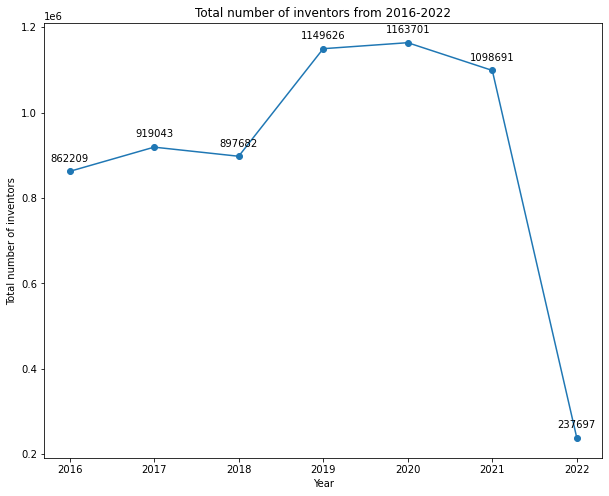

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, total_counts, '-o')
plt.xlabel('Year')
plt.ylabel('Total number of inventors')
plt.title('Total number of inventors from 2016-2022')

for i, label in enumerate(total_counts):
    plt.annotate(label, (years[i], total_counts[i]), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()

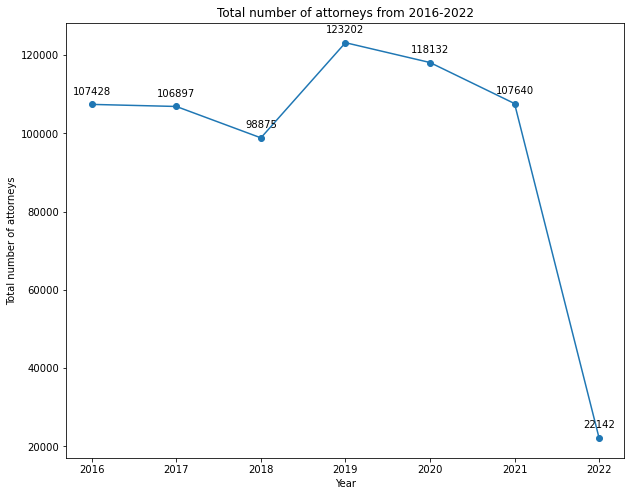

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, total_counts_att, '-o')
plt.xlabel('Year')
plt.ylabel('Total number of attorneys')
plt.title('Total number of attorneys from 2016-2022')
for i, label in enumerate(total_counts_att):
    plt.annotate(label, (years[i], total_counts_att[i]), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()

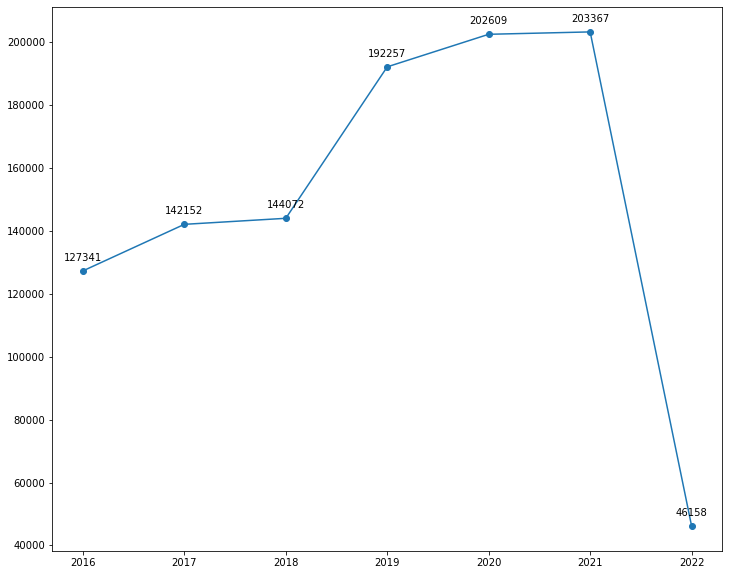

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, female_counts, '-o')

for i, label in enumerate(female_counts):
    plt.annotate(label, (years[i], female_counts[i]), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()

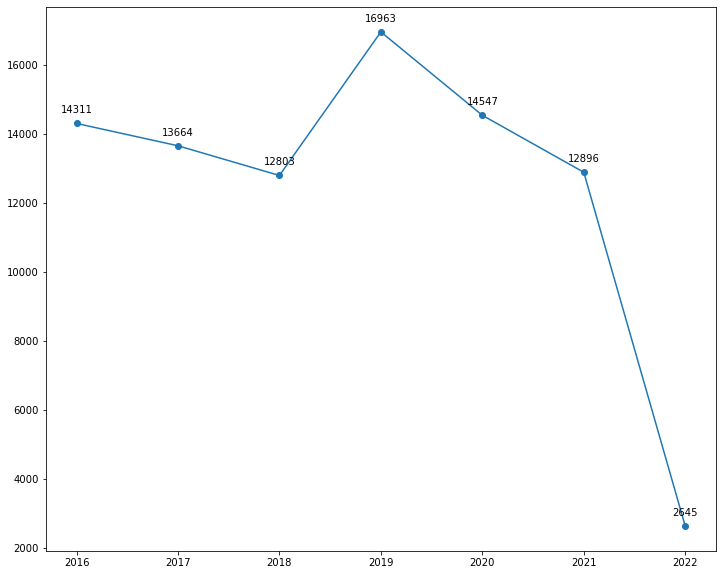

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, female_counts_att, '-o')

for i, label in enumerate(female_counts_att):
    plt.annotate(label, (years[i], female_counts_att[i]), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()

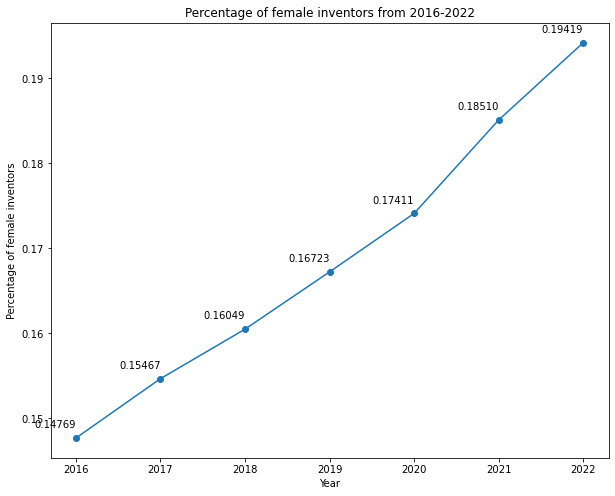

In [13]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, f_r, '-o')
plt.xlabel('Year')
plt.ylabel('Percentage of female inventors')
plt.title('Percentage of female inventors from 2016-2022')

for i, label in enumerate(f_r):
    plt.annotate('%.5f' % label, (years[i], f_r[i]), textcoords='offset points', xytext=(0,10), ha='right')

plt.show()

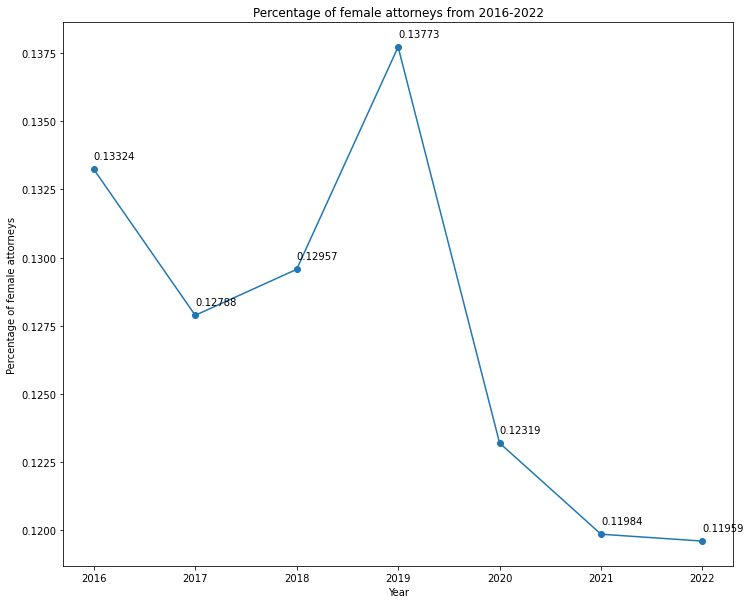

In [16]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, fa_r, '-o')
plt.xlabel('Year')
plt.ylabel('Percentage of female attorneys')
plt.title('Percentage of female attorneys from 2016-2022')
for i, label in enumerate(fa_r):
    plt.annotate('%.5f' % label, (years[i], fa_r[i]), textcoords='offset points', xytext=(0,10), ha='left')

plt.show()

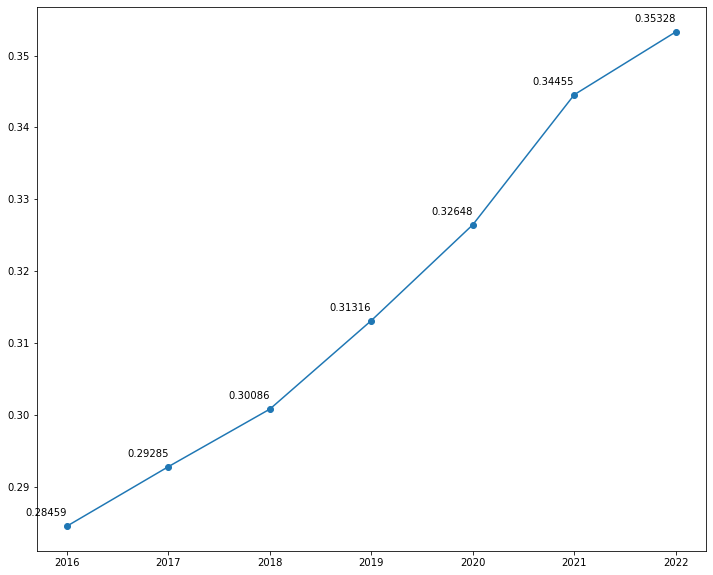

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, aof_r, '-o')

for i, label in enumerate(aof_r):
    plt.annotate('%.5f' % label, (years[i], aof_r[i]), textcoords='offset points', xytext=(0,10), ha='right')

plt.show()

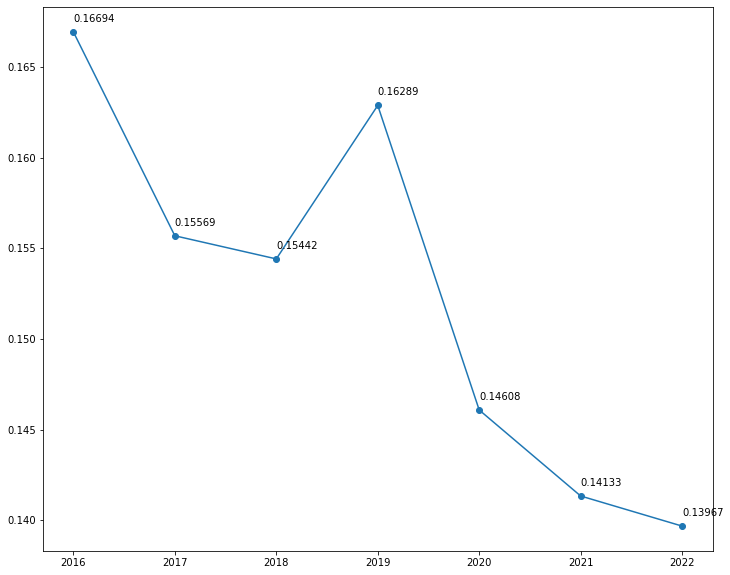

In [35]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, aofa_r, '-o')

for i, label in enumerate(aofa_r):
    plt.annotate('%.5f' % label, (years[i], aofa_r[i]), textcoords='offset points', xytext=(0,10), ha='left')

plt.show()

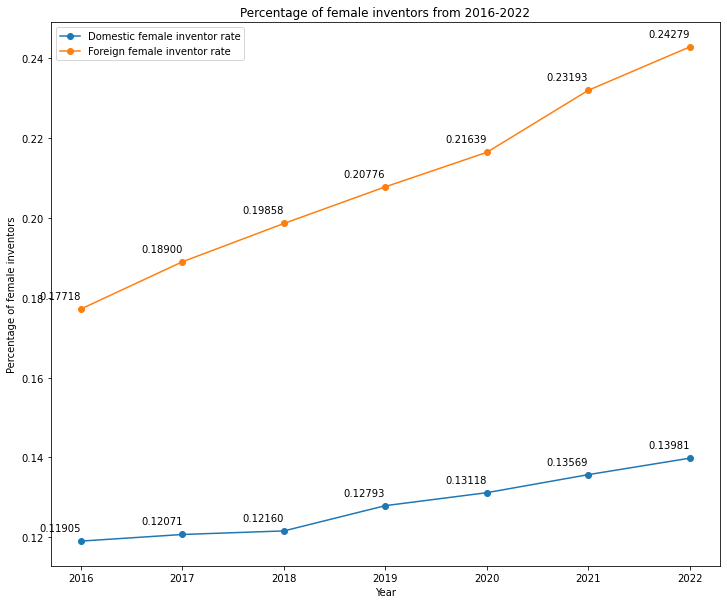

In [23]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, d_r, '-o', label='Domestic female inventor rate')
plt.plot(years, fo_r, '-o', label='Foreign female inventor rate')
plt.legend(loc='upper left')

plt.xlabel('Year')
plt.ylabel('Percentage of female inventors')
plt.title('Percentage of female inventors from 2016-2022')

for i, label in enumerate(d_r):
    plt.annotate('%.5f' % label, (years[i], d_r[i]), textcoords='offset points', xytext=(0,10), ha='right')

for i, label in enumerate(fo_r):
    plt.annotate('%.5f' % label, (years[i], fo_r[i]), textcoords='offset points', xytext=(0,10), ha='right')

plt.show()

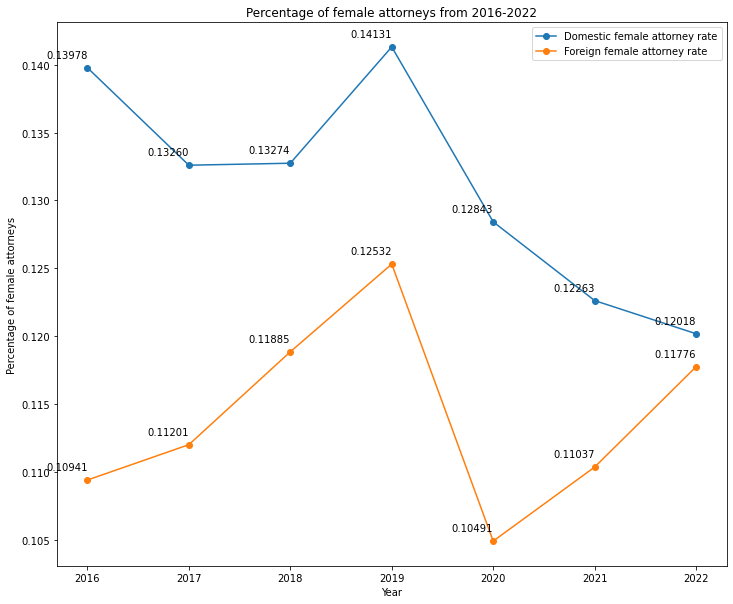

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(years, da_r, '-o', label='Domestic female attorney rate')
plt.plot(years, foa_r, '-o', label='Foreign female attorney rate')
plt.legend(loc='upper right')

plt.xlabel('Year')
plt.ylabel('Percentage of female attorneys')
plt.title('Percentage of female attorneys from 2016-2022')

for i, label in enumerate(da_r):
    plt.annotate('%.5f' % label, (years[i], da_r[i]), textcoords='offset points', xytext=(0,10), ha='right')

for i, label in enumerate(foa_r):
    plt.annotate('%.5f' % label, (years[i], foa_r[i]), textcoords='offset points', xytext=(0,10), ha='right')

plt.show()

In [5]:
import pandas as pd
from ast import literal_eval

def process(df_in):
    male_list = []
    female_list = []
    team_size = []
    male_list_att = []
    female_list_att = []
    team_size_att = []

    for j in range(len(df_in['inventor_firstname'])):
        male = 0
        female = 0
        name_list = literal_eval(df_in['inventor_firstname'][j])
        team_size.append(len(name_list))
        for z in range(len(name_list)):
            try:
                name_ = name_list[z].split()[0]
                if '-' in name_:
                    name_ = name_.split('-')[0]
                if mydict.get(name_.lower()) == 'F':
                    female += 1
                elif mydict.get(name_.lower()) == 'M':
                    male += 1
                else:
                    res = classifier.classify(gender_features(name_))
                    if res == 'male':
                        male += 1
                    else:
                        female += 1
            except:
                continue
        male_list.append(male)
        female_list.append(female)

    for k in range(len(df_in['attorney_firstname'])):
        male = 0
        female = 0
        name_list = literal_eval(df_in['attorney_firstname'][k])
        team_size_att.append(len(name_list))
        for y in range(len(name_list)):
            try:
                name_ = name_list[y].split()[0]
                if '-' in name_:
                    name_ = name_.split('-')[0]
                if mydict.get(name_.lower()) == 'F':
                    female += 1
                elif mydict.get(name_.lower()) == 'M':
                    male += 1
                else:
                    res = classifier.classify(gender_features(name_))
                    if res == 'male':
                        male += 1
                    else:
                        female += 1
            except:
                continue
        male_list_att.append(male)
        female_list_att.append(female)

    df_in['inventor males'] = male_list
    df_in['inventor females'] = female_list
    df_in['inventor team size'] = team_size
    df_in['attorney males'] = male_list_att
    df_in['attorney females'] = female_list_att
    df_in['attorney team size'] = team_size_att
    return df_in

df = pd.read_csv('2016_patent_grant.csv')
df = process(df)
df.head()

,publication_id,publication_kind,publication_date,application_id,application_date,country,inventor_name,inventor_firstname,inventor_country,invention_title,number_of_claims,attorney_name,attorney_firstname,inventor males,inventor females,inventor team size,attorney males,attorney females,attorney team size
0,USD0746541,S1,20160105,US29490315,20140508,US,['Sambashivan Sidharth'],['Sidharth'],['US'],Snack food product,1,"['Cahoon Colin P.', 'Orr Celina M.']","['Colin P.', 'Celina M.']",1,0,1,1,1,2
1,USD0746542,S1,20160105,US29490956,20140515,US,['Gilroy Brian'],['Brian'],['US'],Combined pair of suspenders and attachment mem...,1,[],[],1,0,1,0,0,0
2,USD0746544,S1,20160105,US29504333,20141003,US,['Curran David Jeffrey'],['David Jeffrey'],['US'],Convertible shorts,1,[],[],1,0,1,0,0,0
3,USD0746545,S1,20160105,US29527119,20150515,US,['Kositchiranant Paridee'],['Paridee'],['US'],Pants,1,[],[],0,1,1,0,0,0
4,USD0746546,S1,20160105,US29531599,20150626,US,['Rosenbaum Vadim'],['Vadim'],['CA'],Asymmetrical pants,1,['Eisenberg Michael D.'],['Michael D.'],1,0,1,1,0,1


In [7]:
import os

file_list = os.listdir(os.curdir)

for file in file_list:
    if file.endswith('grant.csv'):
        print(file)
        df = process(pd.read_csv(file))
        file = file.rsplit('.', 1)[0]
        df.to_csv(file + "_processed.csv")

2016_patent_grant.csv
2017_patent_grant.csv
2018_patent_grant.csv
2019_patent_grant.csv
2020_patent_grant.csv
2021_patent_grant.csv
2022_patent_grant.csv


In [20]:
file_list = os.listdir(os.curdir)

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

aof = []
nf = []
allf = []

aof_att = []
nf_att = []
allf_att = []

for file in file_list:
    if file.endswith('processed.csv'):
        df = pd.read_csv(file)
        aof_count = 0
        nf_count = 0
        allf_count = 0
        for i in range(len(df['inventor team size'])):
            if df['inventor males'][i] == df['inventor team size'][i]:
                nf_count += 1
            elif df['inventor females'][i] == df['inventor team size'][i]:
                allf_count += 1
            else:
                aof_count += 1
        aof.append(aof_count / len(df['inventor team size']))
        nf.append(nf_count / len(df['inventor team size']))
        allf.append(allf_count / len(df['inventor team size']))

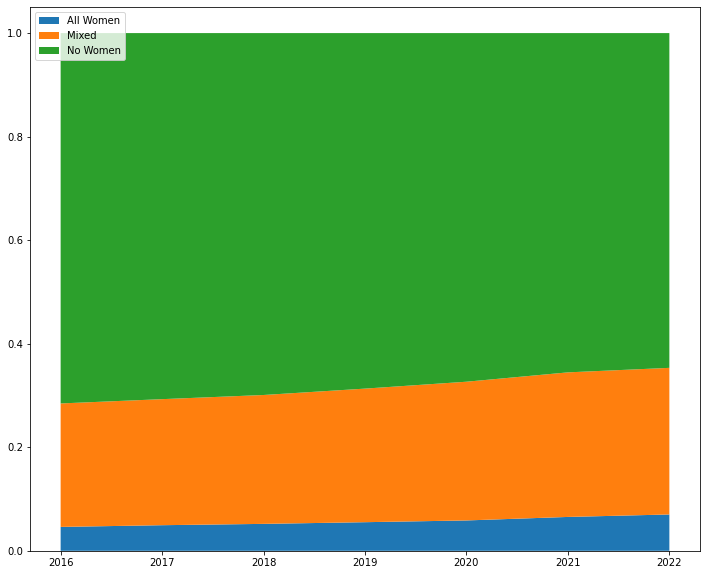

In [21]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['All Women', 'Mixed', 'No Women']
fig, ax = plt.subplots(figsize=(12,10))
ax.stackplot(years,allf,aof,nf, labels=labels)
ax.legend(loc='upper left')
plt.show()

In [25]:
import statsmodels.formula.api as smf

df = pd.read_csv('2016_patent_grant_processed.csv')
df.head()

,Unnamed: 0,publication_id,publication_kind,publication_date,application_id,application_date,country,inventor_name,inventor_firstname,inventor_country,invention_title,number_of_claims,attorney_name,attorney_firstname,inventor males,inventor females,inventor team size,attorney males,attorney females,attorney team size
0,0,USD0746541,S1,20160105,US29490315,20140508,US,['Sambashivan Sidharth'],['Sidharth'],['US'],Snack food product,1,"['Cahoon Colin P.', 'Orr Celina M.']","['Colin P.', 'Celina M.']",1,0,1,1,1,2
1,1,USD0746542,S1,20160105,US29490956,20140515,US,['Gilroy Brian'],['Brian'],['US'],Combined pair of suspenders and attachment mem...,1,[],[],1,0,1,0,0,0
2,2,USD0746544,S1,20160105,US29504333,20141003,US,['Curran David Jeffrey'],['David Jeffrey'],['US'],Convertible shorts,1,[],[],1,0,1,0,0,0
3,3,USD0746545,S1,20160105,US29527119,20150515,US,['Kositchiranant Paridee'],['Paridee'],['US'],Pants,1,[],[],0,1,1,0,0,0
4,4,USD0746546,S1,20160105,US29531599,20150626,US,['Rosenbaum Vadim'],['Vadim'],['CA'],Asymmetrical pants,1,['Eisenberg Michael D.'],['Michael D.'],1,0,1,1,0,1


In [34]:
model = smf.ols("Q('inventor females')~Q('inventor team size')+number_of_claims+publication_kind", data=df)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     Q('inventor females')   R-squared:                       0.194
Model:                               OLS   Adj. R-squared:                  0.194
Method:                    Least Squares   F-statistic:                 1.065e+04
Date:                   Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                           11:10:33   Log-Likelihood:            -3.4076e+05
No. Observations:                 310048   AIC:                         6.815e+05
Df Residuals:                     310040   BIC:                         6.816e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [37]:
team = df.groupby('inventor team size', as_index=False)['inventor females'].mean()
print(team)

    inventor team size  inventor females
0                    1          0.109128
1                    2          0.250638
2                    3          0.428485
3                    4          0.623585
4                    5          0.824894
5                    6          1.004138
6                    7          1.230898
7                    8          1.363286
8                    9          1.548020
9                   10          1.884239
10                  11          2.102273
11                  12          2.211679
12                  13          2.631387
13                  14          2.533784
14                  15          2.643478
15                  16          2.651163
16                  17          2.756098
17                  18          3.636364
18                  19          2.545455
19                  20          1.534884
20                  21          2.625000
21                  22          2.000000
22                  23          2.666667
23              

In [39]:
team['P'] = team['inventor females'] / team['inventor team size']
print(team)

    inventor team size  inventor females         P
0                    1          0.109128  0.109128
1                    2          0.250638  0.125319
2                    3          0.428485  0.142828
3                    4          0.623585  0.155896
4                    5          0.824894  0.164979
5                    6          1.004138  0.167356
6                    7          1.230898  0.175843
7                    8          1.363286  0.170411
8                    9          1.548020  0.172002
9                   10          1.884239  0.188424
10                  11          2.102273  0.191116
11                  12          2.211679  0.184307
12                  13          2.631387  0.202414
13                  14          2.533784  0.180985
14                  15          2.643478  0.176232
15                  16          2.651163  0.165698
16                  17          2.756098  0.162123
17                  18          3.636364  0.202020
18                  19         

In [46]:
p = []

for file in file_list:
    if file.endswith('processed.csv'):
        df = pd.read_csv(file)
        team = df.groupby('inventor team size', as_index=False)['inventor females'].mean()
        temp = team['inventor females'] / team['inventor team size']
        p.append(temp[:20].tolist())

print(p)

[[0.10912776321514608, 0.1253187833883654, 0.14282849373890374, 0.15589624508536296, 0.16497882352941176, 0.16735634207900452, 0.1758425091758425, 0.17041073546856464, 0.17200217037438958, 0.18842386464826358, 0.19111570247933882, 0.1843065693430657, 0.20241437394722067, 0.18098455598455598, 0.176231884057971, 0.16569767441860464, 0.16212338593974174, 0.20202020202020202, 0.1339712918660287, 0.07674418604651163], [0.11452488458221298, 0.1284926281059903, 0.1495506277912608, 0.16512193922706264, 0.1697998143974546, 0.1774215816213828, 0.17715955787021778, 0.17953065653825284, 0.18898832888470196, 0.20644897959183672, 0.18772315297995057, 0.20341499628804752, 0.1951617287306333, 0.1756383712905452, 0.19753086419753085, 0.16974431818181818, 0.21209610604805304, 0.19958847736625515, 0.13995215311004786, 0.11388888888888889], [0.11910866976364944, 0.13220526343828246, 0.15603057122647204, 0.16987861344012015, 0.17893735561896998, 0.18162220425761252, 0.17836928254551015, 0.1828163601427395,

In [47]:
print(len(p))

7


In [45]:
print(p[0])

0     0.109128
1     0.125319
2     0.142828
3     0.155896
4     0.164979
5     0.167356
6     0.175843
7     0.170411
8     0.172002
9     0.188424
10    0.191116
11    0.184307
12    0.202414
13    0.180985
14    0.176232
15    0.165698
16    0.162123
17    0.202020
18    0.133971
19    0.076744
dtype: float64


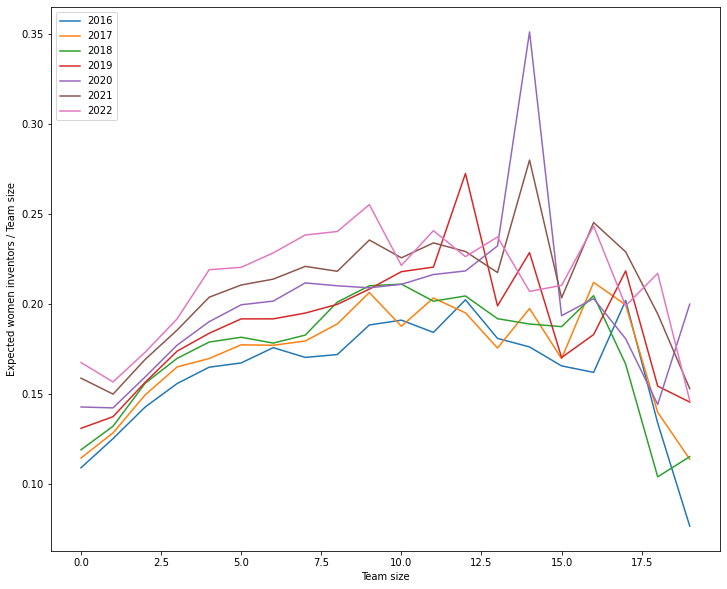

In [50]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

for i in range(len(p)):
    plt.plot(p[i], label=years[i])

plt.legend(loc='upper left')
plt.ylabel('Expected women inventors / Team size')
plt.xlabel('Team size')
plt.show()